# Project 1 DA using Pandas Scikit_learn Coding Internship

## Topic: Performing Analysis of Meteorological Data

## Problem Definition


Perform Data Analysis on the Meteorological Dataset and convert raw information into knowledge. Perform data cleaning, analysis & testing the given hypothesis and then report the conclusion. The given dataset has Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming.
Find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not.

## Import the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df = pd.read_csv('F:\Suven Intern\WeatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## Data Preparation

In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [4]:
df.shape

(96453, 11)

In [5]:
df.size

1060983

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [8]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

## Data Cleaning

In [9]:
df=df.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)',
            'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Daily Summary'], axis=1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


## Data Formatting

In [10]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df=df.set_index('Formatted Date')
df.head(10)

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83
2006-04-01 03:00:00+00:00,7.111111,0.85
2006-04-01 04:00:00+00:00,5.522222,0.95
2006-04-01 05:00:00+00:00,6.527778,0.89
2006-04-01 06:00:00+00:00,10.822222,0.82


## Resampling

In [11]:
#after resampling
df1 = df[['Apparent Temperature (C)', 'Humidity']] .resample('MS').mean()
df1.head(10)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125
2006-07-01 00:00:00+00:00,23.595348,0.656304
2006-08-01 00:00:00+00:00,19.528241,0.760753


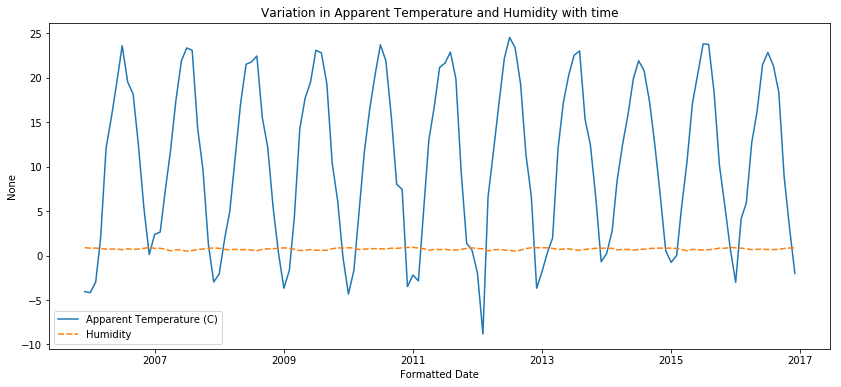

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore") 
plt.figure (figsize=(14,6))
plt.title ("Variation in Apparent Temperature and Humidity with time")
sns.lineplot (data=df1)

## Data Analysis

In [13]:
#retrieving the data of a particular month from every year, say Jan
Jan = df1[df1.index.month==1]
print(Jan)
Jan.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2007-01-01 00:00:00+00:00                  2.387015  0.813495
2008-01-01 00:00:00+00:00                 -2.069907  0.819476
2009-01-01 00:00:00+00:00                 -3.669937  0.867621
2010-01-01 00:00:00+00:00                 -4.329062  0.875914
2011-01-01 00:00:00+00:00                 -2.186813  0.922030
2012-01-01 00:00:00+00:00                 -1.965211  0.797581
2013-01-01 00:00:00+00:00                 -1.768578  0.883105
2014-01-01 00:00:00+00:00                  0.234536  0.846169
2015-01-01 00:00:00+00:00                 -0.770124  0.831519
2016-01-01 00:00:00+00:00                 -3.014576  0.866156


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [14]:
#retrieving the data of a Feb month from every year
Feb = df1[df1.index.month==2]
print(Feb)
Feb.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2007-02-01 00:00:00+00:00                  2.639848  0.815015
2008-02-01 00:00:00+00:00                  1.915597  0.682615
2009-02-01 00:00:00+00:00                 -1.641237  0.821161
2010-02-01 00:00:00+00:00                 -1.662045  0.851682
2011-02-01 00:00:00+00:00                 -2.849471  0.854137
2012-02-01 00:00:00+00:00                 -8.817241  0.762859
2013-02-01 00:00:00+00:00                  0.418171  0.869345
2014-02-01 00:00:00+00:00                  2.742998  0.812530
2015-02-01 00:00:00+00:00                  0.017006  0.803452
2016-02-01 00:00:00+00:00                  4.150782  0.836853


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [15]:
#retrieving March month from every year
March = df1[df1.index.month==3]
print(March)
March.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-03-01 00:00:00+00:00                  1.969780  0.778737
2007-03-01 00:00:00+00:00                  7.174619  0.713884
2008-03-01 00:00:00+00:00                  5.004353  0.668468
2009-03-01 00:00:00+00:00                  4.280585  0.696680
2010-03-01 00:00:00+00:00                  4.589038  0.670161
2011-03-01 00:00:00+00:00                  4.589785  0.782970
2012-03-01 00:00:00+00:00                  6.591502  0.535941
2013-03-01 00:00:00+00:00                  1.957445  0.809946
2014-03-01 00:00:00+00:00                  8.408303  0.640403
2015-03-01 00:00:00+00:00                  5.441592  0.669476
2016-03-01 00:00:00+00:00                  5.901404  0.764677


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [16]:
#retrieving April month from every year
Apr = df1[df1.index.month==4]
print(Apr)
Apr.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [17]:
#retrieving May month from every year
May = df1[df1.index.month==5]
print(May)
May.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-05-01 00:00:00+00:00                 15.539479  0.721801
2007-05-01 00:00:00+00:00                 17.453136  0.653253
2008-05-01 00:00:00+00:00                 17.113583  0.663132
2009-05-01 00:00:00+00:00                 17.691256  0.597151
2010-05-01 00:00:00+00:00                 16.409879  0.773091
2011-05-01 00:00:00+00:00                 16.644922  0.688038
2012-05-01 00:00:00+00:00                 16.985596  0.672863
2013-05-01 00:00:00+00:00                 17.208976  0.735309
2014-05-01 00:00:00+00:00                 15.752218  0.698602
2015-05-01 00:00:00+00:00                 17.067660  0.702742
2016-05-01 00:00:00+00:00                 16.199216  0.702164


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [18]:
#retrieving June month from every year
June = df1[df1.index.month==6]
print(June)
June.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-06-01 00:00:00+00:00                 19.535965  0.747125
2007-06-01 00:00:00+00:00                 21.883102  0.616486
2008-06-01 00:00:00+00:00                 21.513750  0.679861
2009-06-01 00:00:00+00:00                 19.526790  0.675944
2010-06-01 00:00:00+00:00                 20.340571  0.778347
2011-06-01 00:00:00+00:00                 21.157114  0.677611
2012-06-01 00:00:00+00:00                 22.157130  0.622306
2013-06-01 00:00:00+00:00                 20.345664  0.761847
2014-06-01 00:00:00+00:00                 19.874306  0.602403
2015-06-01 00:00:00+00:00                 20.511782  0.655208
2016-06-01 00:00:00+00:00                 21.463387  0.733458


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [19]:
#retrieving July month from every year
July = df1[df1.index.month==7]
print(July)
July.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-07-01 00:00:00+00:00                 23.595348  0.656304
2007-07-01 00:00:00+00:00                 23.348081  0.491250
2008-07-01 00:00:00+00:00                 21.765562  0.616022
2009-07-01 00:00:00+00:00                 23.091614  0.600215
2010-07-01 00:00:00+00:00                 23.699447  0.755323
2011-07-01 00:00:00+00:00                 21.634984  0.707500
2012-07-01 00:00:00+00:00                 24.525343  0.580860
2013-07-01 00:00:00+00:00                 22.533669  0.636586
2014-07-01 00:00:00+00:00                 21.911598  0.699393
2015-07-01 00:00:00+00:00                 23.803487  0.622984
2016-07-01 00:00:00+00:00                 22.840226  0.669328


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [20]:
#retrieving Aug month from every year
Aug = df1[df1.index.month==8]
print(Aug)
Aug.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-08-01 00:00:00+00:00                 19.528241  0.760753
2007-08-01 00:00:00+00:00                 23.079689  0.562876
2008-08-01 00:00:00+00:00                 22.438852  0.551895
2009-08-01 00:00:00+00:00                 22.794205  0.597231
2010-08-01 00:00:00+00:00                 21.906713  0.742786
2011-08-01 00:00:00+00:00                 22.874126  0.631263
2012-08-01 00:00:00+00:00                 23.384334  0.500081
2013-08-01 00:00:00+00:00                 23.005249  0.596263
2014-08-01 00:00:00+00:00                 20.781870  0.707809
2015-08-01 00:00:00+00:00                 23.745766  0.659825
2016-08-01 00:00:00+00:00                 21.383094  0.674046


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [21]:
#retrieving Sep month from every year
Sep = df1[df1.index.month==9]
print(Sep)
Sep.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-09-01 00:00:00+00:00                 18.155571  0.689444
2007-09-01 00:00:00+00:00                 14.328457  0.682708
2008-09-01 00:00:00+00:00                 15.489606  0.690722
2009-09-01 00:00:00+00:00                 19.322353  0.596764
2010-09-01 00:00:00+00:00                 15.549414  0.826806
2011-09-01 00:00:00+00:00                 19.899900  0.611375
2012-09-01 00:00:00+00:00                 19.302948  0.603319
2013-09-01 00:00:00+00:00                 15.317477  0.691986
2014-09-01 00:00:00+00:00                 17.258387  0.785944
2015-09-01 00:00:00+00:00                 18.308472  0.712889
2016-09-01 00:00:00+00:00                 18.355833  0.688833


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [22]:
#retrieving Oct month from every year
Oct = df1[df1.index.month==10]
print(Oct)
Oct.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-10-01 00:00:00+00:00                 12.398678  0.733642
2007-10-01 00:00:00+00:00                  9.662612  0.740954
2008-10-01 00:00:00+00:00                 12.253390  0.753911
2009-10-01 00:00:00+00:00                 10.433535  0.763468
2010-10-01 00:00:00+00:00                  8.017145  0.815538
2011-10-01 00:00:00+00:00                  9.405167  0.701747
2012-10-01 00:00:00+00:00                 11.435581  0.794315
2013-10-01 00:00:00+00:00                 12.449134  0.748750
2014-10-01 00:00:00+00:00                 12.381803  0.826116
2015-10-01 00:00:00+00:00                 10.170408  0.840524
2016-10-01 00:00:00+00:00                  8.923947  0.799906


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [23]:
#retrieving Nov month from every year
Nov= df1[df1.index.month==11]
print(Nov)
Nov.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-11-01 00:00:00+00:00                  5.328310  0.812722
2007-11-01 00:00:00+00:00                  1.218225  0.801444
2008-11-01 00:00:00+00:00                  5.415039  0.766972
2009-11-01 00:00:00+00:00                  6.177222  0.865292
2010-11-01 00:00:00+00:00                  7.440934  0.858722
2011-11-01 00:00:00+00:00                  1.368519  0.800528
2012-11-01 00:00:00+00:00                  6.608133  0.871389
2013-11-01 00:00:00+00:00                  6.425664  0.824792
2014-11-01 00:00:00+00:00                  6.639097  0.839736
2015-11-01 00:00:00+00:00                  5.553040  0.817014
2016-11-01 00:00:00+00:00                  3.048627  0.848472


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

In [24]:
#retrieving Dec month from every year
Dec= df1[df1.index.month==12]
print(Dec)
Dec.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-01 00:00:00+00:00                 -4.050000  0.890000
2006-12-01 00:00:00+00:00                  0.107310  0.905376
2007-12-01 00:00:00+00:00                 -2.964897  0.856250
2008-12-01 00:00:00+00:00                  0.327389  0.828226
2009-12-01 00:00:00+00:00                 -0.169086  0.844637
2010-12-01 00:00:00+00:00                 -3.485947  0.913602
2011-12-01 00:00:00+00:00                  0.618093  0.866223
2012-12-01 00:00:00+00:00                 -3.672909  0.886801
2013-12-01 00:00:00+00:00                 -0.690054  0.823965
2014-12-01 00:00:00+00:00                  0.556586  0.835927
2015-12-01 00:00:00+00:00                  0.828644  0.925390
2016-12-01 00:00:00+00:00                 -2.017272  0.887981


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

## Data Visualization 

Text(0.5,1,'January')

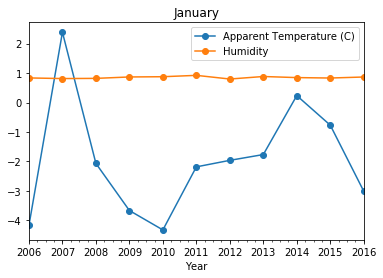

In [25]:
Jan.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("January")

Text(0.5,1,'February')

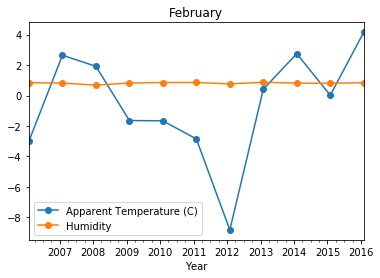

In [26]:
Feb.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("February")

Text(0.5,1,'March')

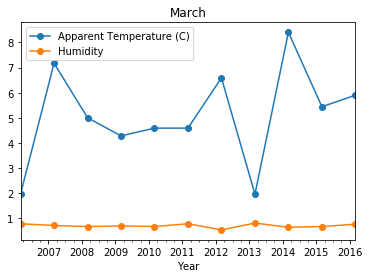

In [27]:
March.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("March")

Text(0.5,1,'April')

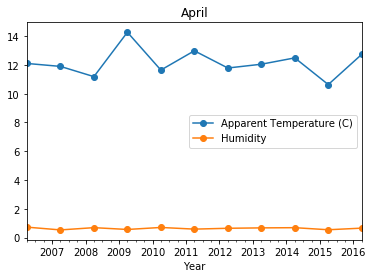

In [28]:
Apr.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("April")

Text(0.5,1,'May')

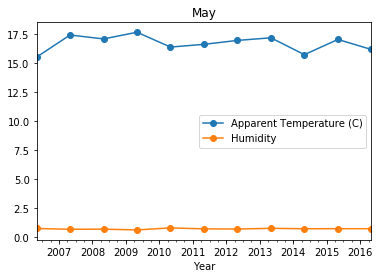

In [29]:
May.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("May")

Text(0.5,1,'June')

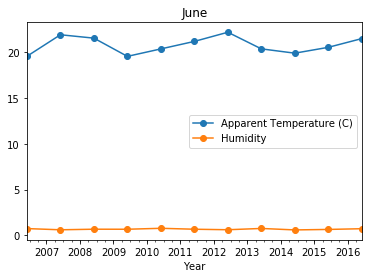

In [30]:
June.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("June")

Text(0.5,1,'July')

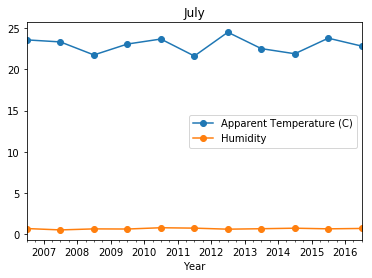

In [31]:
July.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("July")

Text(0.5,1,'August')

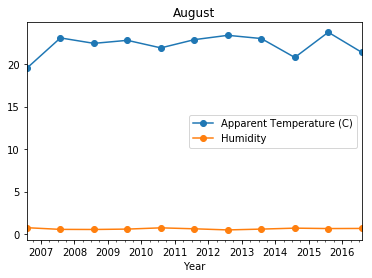

In [32]:
Aug.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("August")

Text(0.5,1,'September')

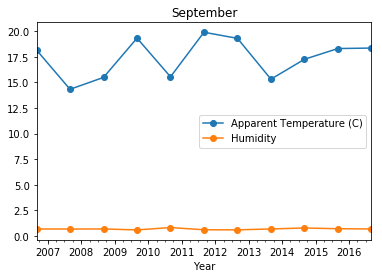

In [33]:
Sep.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("September")

Text(0.5,1,'October')

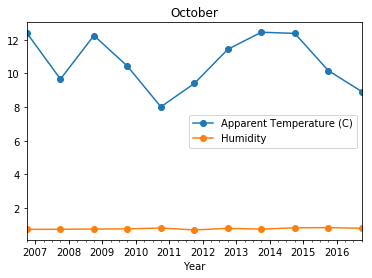

In [34]:
Oct.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("October")

Text(0.5,1,'November')

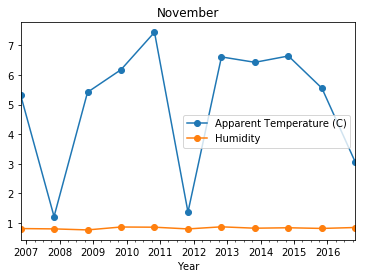

In [35]:
Nov.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("November")

Text(0.5,1,'December')

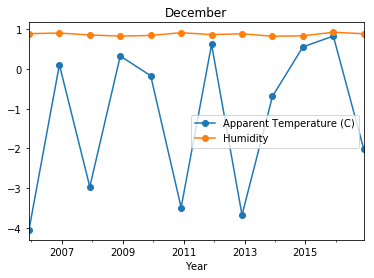

In [36]:
Dec.plot(kind='line',marker='o')
plt.xlabel("Year")
plt.title("December")

## Observation :

### - No change in average humidity over the ten years from 2006 to 2016. 

### - Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 ,
### then a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016.